## Time Series Forcasting..

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

In [2]:
import os
os.chdir('C:/DBAR')
df=pd.read_csv('portland_monthly_avg.csv')

In [3]:
df.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [4]:
df.tail()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
109,1969-02,1425
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327


In [5]:
df.shape

(114, 2)

In [6]:
df.columns

Index(['Month', 'Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114'], dtype='object')

In [7]:
df.describe()

,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
count,114.000000
mean,1120.543860
std,270.888317
min,613.000000
25%,885.000000
50%,1158.000000
75%,1340.000000
max,1558.000000


In [8]:
df.dtypes

Month                                                                                         object
Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114     int64
dtype: object

In [9]:
df.columns = ["month", "average_monthly_ridership"]
df.head()

,month,average_monthly_ridership
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [10]:
df['average_monthly_ridership'] = df['average_monthly_ridership'].astype(np.int32)

In [11]:
df['month'] = pd.to_datetime(df['month'], format = '%Y-%m')

In [12]:
df.dtypes

month                        datetime64[ns]
average_monthly_ridership             int32
dtype: object

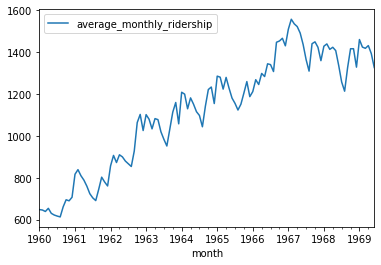

In [13]:
## To see data variation..
df.plot.line(x = 'month', y = 'average_monthly_ridership')
plt.show()

In [14]:
to_plot_monthly_variation = df

In [15]:
## for storing only month..
mon = df['month']

In [16]:
temp= pd.DatetimeIndex(mon)

In [17]:
month = pd.Series(temp.month)

In [18]:
to_plot_monthly_variation = to_plot_monthly_variation.drop(['month'], axis = 1)

In [19]:
## joining months so that we can get average mapping
to_plot_monthly_variation = to_plot_monthly_variation.join(month)


In [20]:
to_plot_monthly_variation.head()

,average_monthly_ridership,month
0,648,1
1,646,2
2,639,3
3,654,4
4,630,5


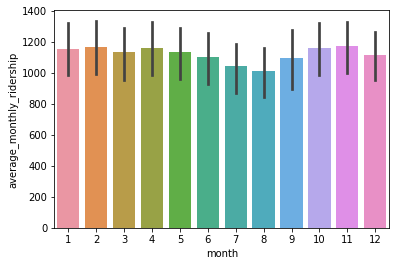

In [21]:
## plotting for each month..
sns.barplot(x = 'month', y = 'average_monthly_ridership', data = to_plot_monthly_variation)
plt.show()

In [22]:
rider = df[['average_monthly_ridership']]

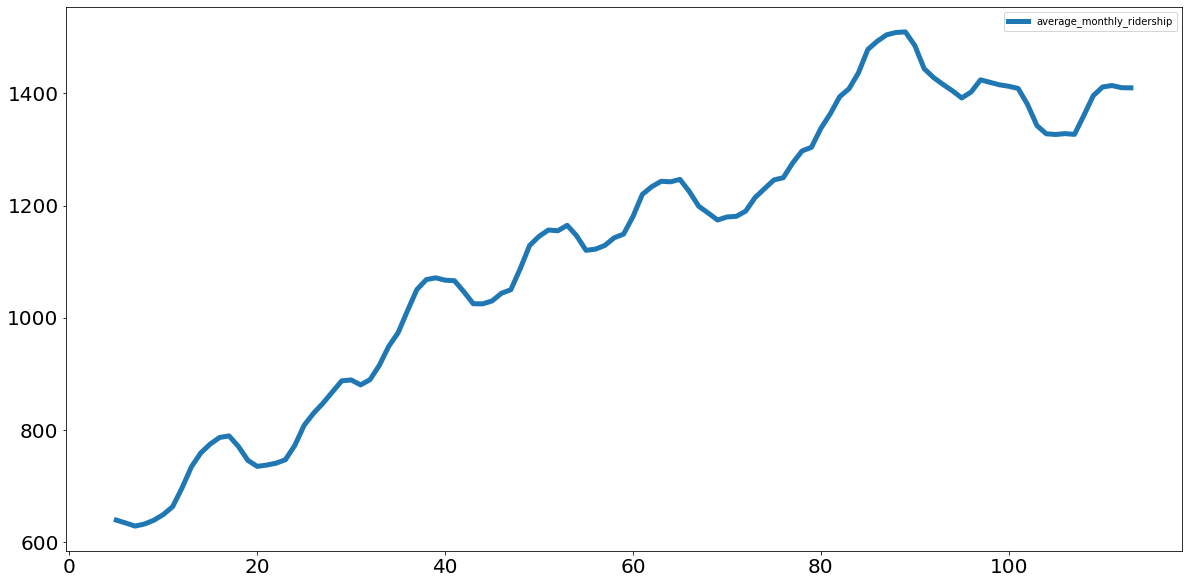

In [23]:
## TREND ANALYSIS..
rider.rolling(6).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

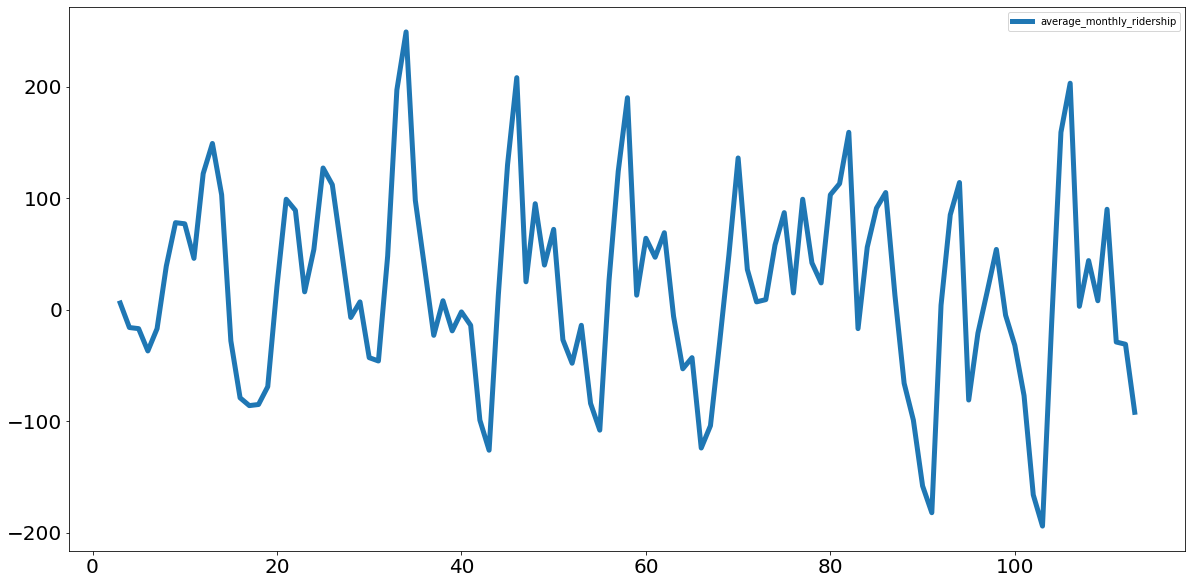

In [25]:
## Seasonability analysis
rider.diff(periods=3).plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

## To check Autocorrelation with lag dependent variable

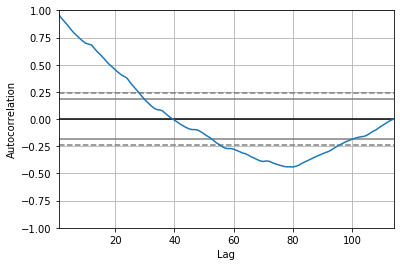

In [26]:
pd.plotting.autocorrelation_plot(df['average_monthly_ridership'])
plt.show()

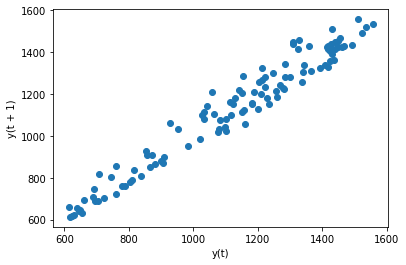

In [27]:
pd.plotting.lag_plot(df['average_monthly_ridership'])
plt.show()

In [28]:
df = df.set_index('month')

In [29]:
## Implementing Seasonal ARIMA model for forcasting..
mod = sm.tsa.SARIMAX(df['average_monthly_ridership'], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

C:\Users\dell laptop\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\dell laptop\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:            average_monthly_ridership   No. Observations:                  114
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -501.340
Date:                              Fri, 04 Sep 2020   AIC                           1008.680
Time:                                      21:01:03   BIC                           1016.526
Sample:                                  01-01-1960   HQIC                          1011.856
                                       - 06-01-1969                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.3236      0.186      1.739      0.082      -0.041       0.688
ma.S.L12      -0.99

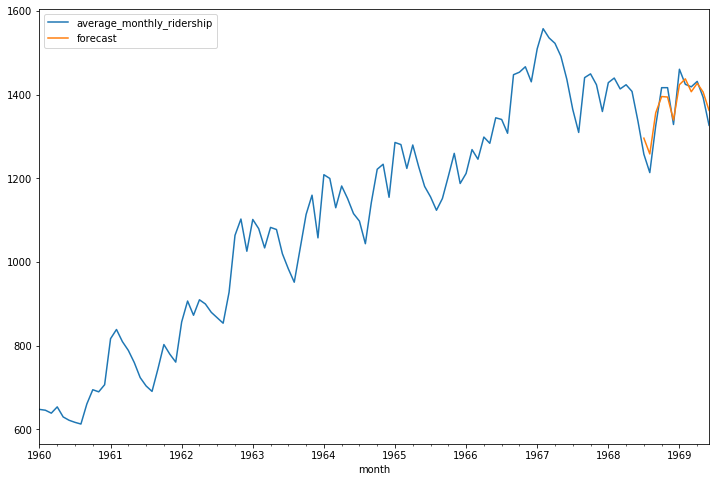

In [30]:
df['forecast'] = results.predict(start = 102, end= 120, dynamic= True)  
df[['average_monthly_ridership', 'forecast']].plot(figsize=(12, 8))
plt.show()

## Future Forecast..

In [31]:
def forcasting_future_months(df, no_of_months):
    df_perdict = df.reset_index()
    mon = df_perdict['month']
    mon = mon + pd.DateOffset(months = no_of_months)
    future_dates = mon[-no_of_months -1:]
    df_perdict = df_perdict.set_index('month')
    future = pd.DataFrame(index=future_dates, columns= df_perdict.columns)
    df_perdict = pd.concat([df_perdict, future])
    df_perdict['forecast'] = results.predict(start = 114, end = 125, dynamic= True)  
    df_perdict[['average_monthly_ridership', 'forecast']].iloc[-no_of_months - 12:].plot(figsize=(12, 8))
    plt.show()
    return df_perdict[-no_of_months:]

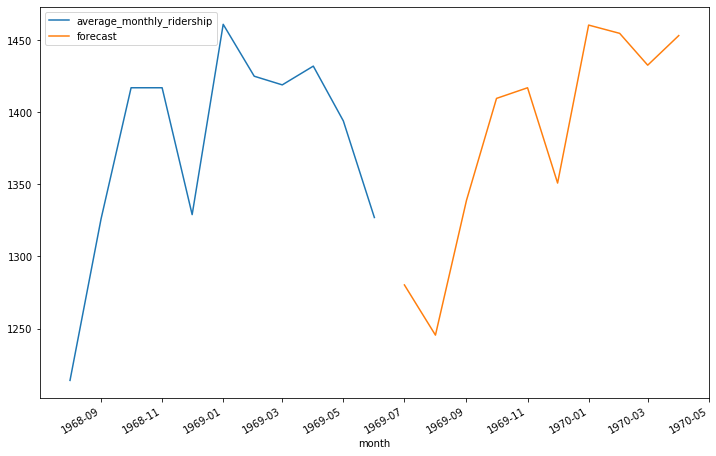

In [32]:
predicted = forcasting_future_months(df,10)

In [33]:
df.tail()

,average_monthly_ridership,forecast
month,,
1969-02-01,1425,1438.088757
1969-03-01,1419,1407.274261
1969-04-01,1432,1427.488357
1969-05-01,1394,1406.611357
1969-06-01,1327,1362.727685
